In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [548]:
train=pd.read_csv('/Users/y2z/Desktop/titanic/train.csv')
test=pd.read_csv('/Users/y2z/Desktop/titanic/test.csv')

In [549]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sivic, Mr. Husein",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [550]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [551]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S


In [552]:
train.shape

(891, 12)

In [553]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [554]:
gen_sur=train.groupby('Sex',as_index=False)['Survived'].count()

In [555]:
gen_sur

,Sex,Survived
0,female,314
1,male,577


In [556]:
male_sur=train[train['Sex']=='male'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'},axis=1)
male_sur

,Survived,Count
0,0,468
1,1,109


In [557]:
female_sur=train[train['Sex']=='female'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'},axis=1)
female_sur

,Survived,Count
0,0,81
1,1,233


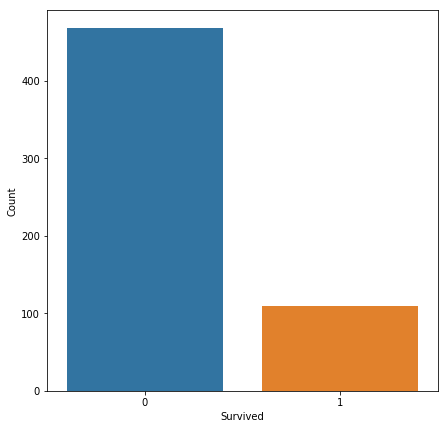

In [558]:
plt.figure(figsize=(7,7))
sns.barplot(x='Survived',y='Count',data=male_sur)
plt.show()

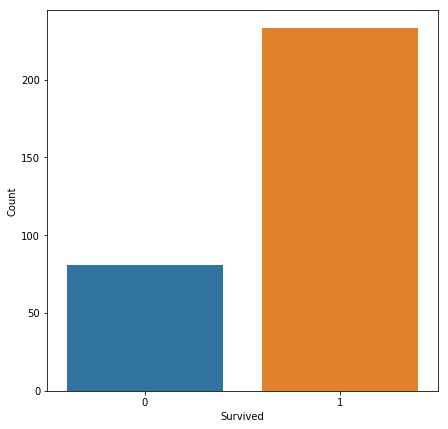

In [559]:
plt.figure(figsize=(7,7))
sns.barplot(x='Survived',y='Count',data=female_sur)
plt.show()

In [560]:
pc_sur=train.groupby('Pclass',as_index=False)[['Survived']].count()
pc_sur

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [561]:
pc_sur1=train[train['Pclass']==1]
pc_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [562]:
pc_male_sur1=pc_sur1[pc_sur1['Sex']=='male'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})

In [563]:
pc_male_sur1

,Survived,PassengerId
0,0,77
1,1,45


In [564]:
pc_sur2=train[train['Pclass']==2]
pc_male_sur2=pc_sur2[pc_sur2['Sex']=='male'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})

In [565]:
pc_male_sur2

,Survived,PassengerId
0,0,91
1,1,17


In [566]:
pc_sur3=train[train['Pclass']==3]
pc_male_sur3=pc_sur3[pc_sur3['Sex']=='male'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})
pc_male_sur3

,Survived,PassengerId
0,0,300
1,1,47


In [567]:
pc_sur1=train[train['Pclass']==1]
pc_female_sur1=pc_sur1[pc_sur1['Sex']=='female'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})
pc_female_sur1

,Survived,PassengerId
0,0,3
1,1,91


In [568]:
pc_sur2=train[train['Pclass']==2]
pc_female_sur2=pc_sur2[pc_sur2['Sex']=='female'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})
pc_female_sur2


,Survived,PassengerId
0,0,6
1,1,70


In [569]:
pc_sur3=train[train['Pclass']==3]
pc_female_sur3=pc_sur3[pc_sur3['Sex']=='female'].groupby('Survived',as_index=False).count()[['Survived','PassengerId']].rename({'PassengerId':'Count'})
pc_female_sur3



,Survived,PassengerId
0,0,72
1,1,72


/Users/y2z/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


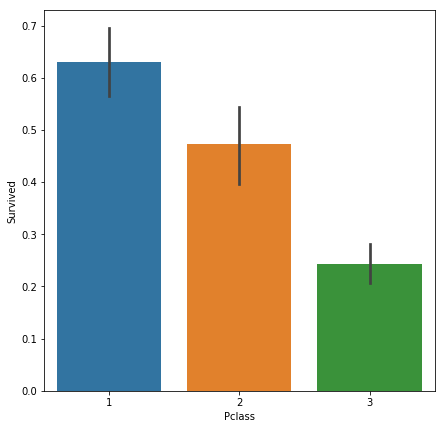

In [570]:
plt.figure(figsize=(7,7))
sns.barplot(x='Pclass',y='Survived',data=train)
plt.show()

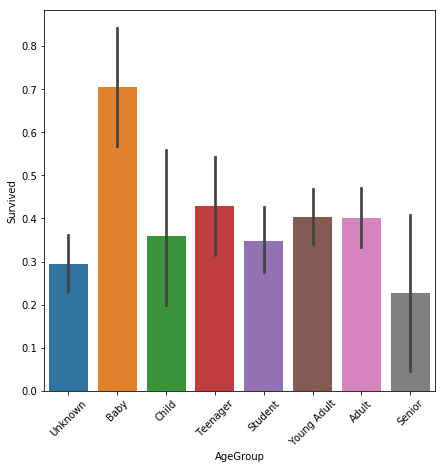

In [571]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup']=pd.cut(train['Age'],bins,labels=labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)
plt.figure(figsize=(7,7))
sns.barplot(x='AgeGroup',y='Survived',data=train)
plt.xticks(rotation=45)
plt.show()

In [572]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,Adult
832,833,0,3,"Saad, Mr. Amin",male,-0.5,0,0,2671,7.2292,NaN,C,Unknown
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S,Teenager
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,Student
64,65,0,1,"Stewart, Mr. Albert A",male,-0.5,0,0,PC 17605,27.7208,NaN,C,Unknown


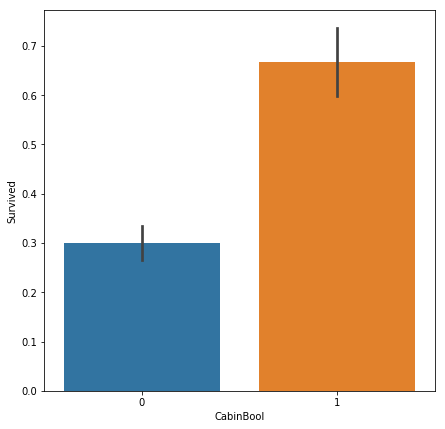

In [573]:
train['CabinBool']=train['Cabin'].notnull().astype('int')
test['CabinBool']=test['Cabin'].notnull().astype('int')
plt.figure(figsize=(7,7))
sns.barplot(x='CabinBool',y='Survived',data=train)
plt.show()

In [574]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Sivic, Mr. Husein",male,NaN,NaN,NaN,1601,NaN,G6,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


In [575]:
# train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [576]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,-0.5,1,0,PC 17604,82.1708,NaN,C,Unknown,0
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S,Young Adult,0
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S,Young Adult,0
420,421,0,3,"Gheorgheff, Mr. Stanio",male,-0.5,0,0,349254,7.8958,NaN,C,Unknown,0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,Adult,1


In [577]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [578]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,31.2750,NaN,S,Child,0
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,15.0458,NaN,C,Student,0
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,6.7500,NaN,Q,Student,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,7.1417,NaN,S,Student,0
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,31.2750,NaN,S,Adult,0


In [579]:
southampton=train[train['Embarked']=='S'].shape[0]

In [580]:
southampton

644

In [581]:
cherbougr=train[train['Embarked']=='C'].shape[0]
cherbougr

168

In [582]:
queenstown=train[train['Embarked']=='Q'].shape[0]
queenstown

77

In [583]:
train=train.fillna({'Embarked':'S'})

In [584]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,204,891,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Sivic, Mr. Husein",male,NaN,NaN,NaN,NaN,G6,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,4,646,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,0.000000


In [585]:
combine=[train,test]

In [586]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])    


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [587]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Miss')

In [588]:
train[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.792000
4,Ms,1.000000
5,Rare,0.250000
6,Royal,1.000000


In [589]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Student,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Young Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Young Adult,0,Mr


In [590]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Young Adult,0,1.0


In [591]:
mr_age=train[train['Title']==1]['AgeGroup'].mode()
miss_age=train[train['Title']==2]['AgeGroup'].mode()
mrs_age=train[train['Title']==3]['AgeGroup'].mode()
master_age=train[train['Title']==4]['AgeGroup'].mode()
royal_age=train[train['Title']==5]['AgeGroup'].mode()
rare_age=train[train['Title']==6]['AgeGroup'].mode()


In [592]:
master_age

0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [593]:
age_title_mapping={1:'Young Adult',2:'Student',3:'Adult',4:'Baby',5:'Adult',6:'Adult'}
for x in range(len(train['AgeGroup'])):
    if (train['AgeGroup'][x]=='Unknown'):
        train['AgeGroup'][x]=age_title_mapping[train['Title'][x]]


In [594]:
for x in range(len(test['AgeGroup'])):
    if (test['AgeGroup'][x]=='Unknown'):
        test['AgeGroup'][x]=age_title_mapping[train['Title'][x]]

In [595]:
age_mapping={'Baby':1,'Child':2,'Teenage':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}
train['AgeGroup']=train['AgeGroup'].map(age_mapping)
test['AgeGroup']=test['AgeGroup'].map(age_mapping)

In [596]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,Title
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,26.5500,C52,S,5.0,1,1.0
196,197,0,3,"Mernagh, Mr. Robert",male,-0.5,0,0,7.7500,NaN,Q,5.0,0,1.0
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,13.0000,NaN,S,6.0,0,1.0
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,7.8958,NaN,S,5.0,0,1.0
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,61.3792,NaN,C,6.0,0,1.0


In [597]:
train=train.drop('Age',axis=1)
test=test.drop('Age',axis=1)
train=train.drop('Name',axis=1)
test=test.drop('Name',axis=1)

In [598]:
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
58,950,3,male,1,0,16.1000,S,4.0,0,1.0
111,1003,3,female,0,0,7.7792,Q,4.0,0,2.0
382,1274,3,female,0,0,14.5000,S,5.0,0,3.0
289,1181,3,male,0,0,8.0500,S,4.0,0,1.0
102,994,3,male,0,0,7.7500,Q,5.0,0,1.0


In [599]:
sex_mapping={'male':1,'female':2}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [600]:
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
34,926,1,1,1,0,57.7500,C,5.0,1,1.0
409,1301,3,2,1,1,13.7750,S,1.0,0,2.0
327,1219,1,1,0,0,79.2000,C,6.0,0,1.0
240,1132,1,2,0,0,27.7208,C,6.0,0,3.0
24,916,1,2,1,3,262.3750,C,6.0,1,3.0


In [601]:
embarked_mapping={'S':0,'C':1,'Q':3}
train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=test['Embarked'].map(embarked_mapping)

In [602]:
train=train.drop('Cabin',axis=1)
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
542,543,0,3,2,4,2,31.2750,0,2.0,0,2.0
797,798,1,3,2,0,0,8.6833,0,5.0,0,3.0
373,374,0,1,1,0,0,135.6333,1,4.0,0,1.0
52,53,1,1,2,1,0,76.7292,1,6.0,1,3.0
128,129,1,3,2,1,1,22.3583,1,4.0,1,2.0


In [603]:
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
197,1089,3,2,0,0,7.7750,0,NaN,0,2.0
2,894,2,1,0,0,9.6875,3,7.0,0,1.0
186,1078,2,2,0,1,21.0000,0,4.0,0,2.0
206,1098,3,2,0,0,7.7500,3,5.0,0,2.0
373,1265,2,1,0,0,13.0000,0,6.0,0,1.0


In [604]:
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass=test['Pclass'][x]
        test['Fare'][x]=round(train[train['Pclass']==pclass]['Fare'].mean(),4)

train['FareBand']=pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])

train=train.drop('Fare',axis=1)
test=test.drop('Fare',axis=1)


/Users/y2z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [605]:
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
41,933,1,1,0,0,0,6.0,1,1.0,3
99,991,3,1,0,0,0,5.0,0,1.0,2
196,1088,1,1,0,2,1,2.0,1,4.0,4
374,1266,1,2,1,1,0,6.0,1,3.0,4
314,1206,1,2,0,0,1,6.0,1,3.0,4


In [606]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
293,294,0,3,2,0,0,0,4.0,0,2.0,2
682,683,0,3,1,0,0,0,4.0,0,1.0,2
308,309,0,2,1,1,0,1,5.0,0,1.0,3
562,563,0,2,1,0,0,0,5.0,0,1.0,2
60,61,0,3,1,0,0,1,4.0,0,1.0,1


In [610]:
from sklearn.metrics import accuracy_score
predictors=train.drop(['PassengerId','Survived'],axis=1)
predictors=predictors.drop('AgeGroup',axis=1)
target=train['Survived']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=.22)

In [612]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

73.6


/Users/y2z/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [614]:
predictors.sample(5)

,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,FareBand
115,3,1,0,0,0,0,1.0,2
73,3,1,1,0,1,0,1.0,2
404,3,2,0,0,0,0,2.0,2
676,3,1,0,0,0,0,1.0,2
768,3,1,1,0,3,0,1.0,3


In [616]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_val)
acc_gbc=round(accuracy_score(y_pred,y_val)*100,2)
print(acc_gbc)

75.63


In [ ]:
# for x in range(len(test['AgeGroup'])):
#     if (test['AgeGroup'][x]=='Unknown'):
#         test['AgeGroup'][x]=age_title_mapping[train['Title'][x]]


# error to be solved